In [27]:
import pandas as pd
import numpy as np
import re
dfs = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8', match=re.compile(r'^Коефіцієнт народжуваності в регіонах України \(1950\—2019\)*$', re.I), thousands='', decimal=',')
df = dfs[0].head()
print(df)

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [14]:
shape_info = df.shape
print(f"Кількість рядків: {shape_info[0]}\nКількість стовпців: {shape_info[1]}")

Кількість рядків: 5
Кількість стовпців: 9


In [15]:
df = df.replace('—', np.nan)
print(df)

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [16]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [17]:
df = df.apply(pd.to_numeric, errors='ignore')
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [18]:
df_percentage = (df.isnull().sum() / len(df)) * 100
print("Порахуйте, яка частка пропусків міститься в кожній колонці:")
print(df_percentage)

Порахуйте, яка частка пропусків міститься в кожній колонці:
Регіон     0.0
1950       0.0
1960       0.0
1970       0.0
1990       0.0
2000       0.0
2012       0.0
2014      20.0
2019      40.0
dtype: float64


In [19]:
# print(df)
df = df.drop(df.index[-1])
print(df)

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1


In [32]:
for col in df.columns:
    if col != 'Регіон':   
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    if col != 'Регіон':
        df.loc[:, col] = df[col].fillna(df[col].mean())

print(df)

             Регіон  1950  1960  1970  1990  2000  2012    2014       2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.075   8.266667
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.900   7.600000
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.100  10.100000
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.100   7.100000
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.200   8.266667


In [34]:
regions_above_mean_2019 = df[df['2019'].notna() & (df['2019'] > df['2019'].mean())]['Регіон']
print("Регіони з народжуваністю у 2019 році вище середньої народжуваності України:")
print(regions_above_mean_2019)

Регіони з народжуваністю у 2019 році вище середньої народжуваності України:
2    Волинська
Name: Регіон, dtype: object


In [33]:
region_max_birthrate_2014 = df[df['2014'] == df['2014'].max()]['Регіон']
print("Регіон з найвищою народжуваністю у 2014 році:")
print(region_max_birthrate_2014)

Регіон з найвищою народжуваністю у 2014 році:
2    Волинська
Name: Регіон, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_2860\3296725427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


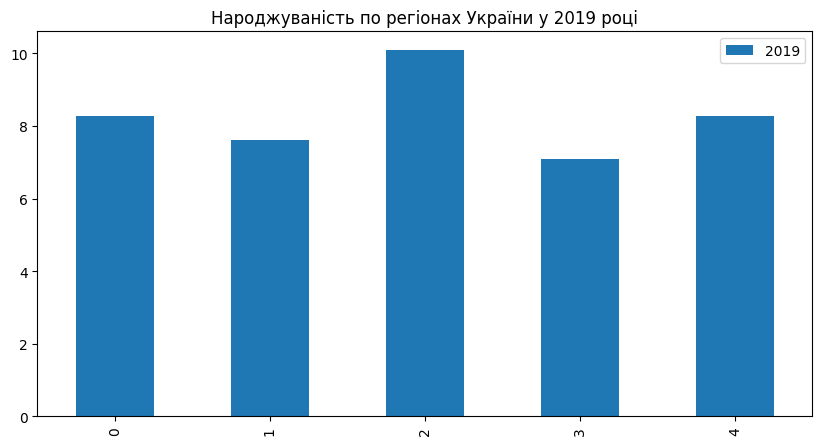

In [35]:
import matplotlib.pyplot as plt

# Перейменовуємо стовпці з роками та вибираємо дані за 2019 рік
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
data_2019 = df[['2019']]

# Видаляємо рядок зі значеннями '—'
data_2019 = data_2019[data_2019['2019'] != '—']

# Змінюємо тип стовпця '2019' на числовий
data_2019['2019'] = data_2019['2019'].astype(float)

# Виводимо графік
data_2019.plot(kind='bar', figsize=(10, 5), title='Народжуваність по регіонах України у 2019 році')
plt.show()

